In [1]:
#Imports
from sklearn import tree
from matplotlib import pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn import model_selection
from pprint import pprint
from matplotlib.pyplot import scatter 
import pandas as pd
np.set_printoptions(suppress=True)

In [2]:
def data_filter(data):
    for line in data:
        print(np.array(line[-5:]))
        if np.array_equal(np.array(line[-5:]),np.zeros(5)):
            data.remove(line)
    return data
       

In [3]:
#Data from file
dataset = np.genfromtxt("all-data-filtered", delimiter='')

#Input
Input = dataset[:, :-8]

#Features
features_file = open("Data-Extraction/features", "r")
features = features_file.readlines()

#Applying scaling
sc = StandardScaler()
Input = sc.fit_transform(Input)

### Parameters of MLPRegressor <br>
hidden_layer_sizes=[(100,),(500,800),(750,1200)]<br>
activation=['identity', 'logistic', 'tanh', 'relu']<br>
early_stopping =[False,True]<br>
validation_fonction=[0.1,0.3,0.5]<br>
n_iter_no_change=[10,100]<br>
max_iter=[1000,2500,5000]<br>
learning_rate_init=[0.001,0.01,0.1]<br>

In [4]:
import time

#c is the num of config: from 1 to 8
def tableConfig(c):
    
    hidden_layer_sizes=[(100,)]
    #activation=['identity', 'logistic', 'tanh', 'relu']
    activation=['identity']
    #early_stopping =[False,True]
    early_stopping =[True]
    validation_fonction=[0.1,0.5]
    n_iter_no_change=[10,100]
    max_iter=[1000,5000]
    learning_rate_init=[0.005,0.1]
    data = []
    
    Output=dataset[:, c-9]
    
    x_train, x_test, y_train, y_test = model_selection.train_test_split(Input, Output, random_state=1, test_size = 0.20)
    x_test, x_validation, y_test, y_validation = model_selection.train_test_split(x_test, y_test, test_size=0.25, random_state=42)
    
    for i in hidden_layer_sizes: 
        for j in activation: 
            for k in early_stopping: 
                for l in validation_fonction: 
                    for m in n_iter_no_change: 
                        for n in max_iter:
                            for o in learning_rate_init:

                                mlp = MLPRegressor(hidden_layer_sizes=i,
                                activation= j,
                                early_stopping = k,
                                validation_fraction=l,
                                n_iter_no_change=m,
                                max_iter= n, 
                                learning_rate_init=o            
                                )
    
                                start = time.time()
                                mlp.fit(x_train, y_train)
                                stop = time.time()
                            
                                data.append({'hidden_layer_sizes':i,
                                'activation':j,
                                'early_stopping': k, 
                                'validation_fraction':l,
                                'n_iter_no_change':m, 
                                'max_iter': n, 
                                'learning_rate_init':o, 
                                'test_score': mlp.score(x_test, y_test),
                                'training time': stop - start
                                })

    table = pd.DataFrame.from_dict(data)
    table = table.replace(np.nan, '-')
    table = table.sort_values(by='test_score', ascending=False)
    #print("Configuration ",str(c+1),": ")
    return table.head(3)
    



In [5]:
tableConfig(3)

C:\Users\Rostom\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


,hidden_layer_sizes,activation,early_stopping,validation_fraction,n_iter_no_change,max_iter,learning_rate_init,test_score,training time
10,"(100,)",identity,True,0.5,10,5000,0.005,-3.988425,0.022491
13,"(100,)",identity,True,0.5,100,1000,0.100,-7.214742,0.042208
15,"(100,)",identity,True,0.5,100,5000,0.100,-7.293298,0.046418


In [6]:
tableConfig(4)

,hidden_layer_sizes,activation,early_stopping,validation_fraction,n_iter_no_change,max_iter,learning_rate_init,test_score,training time
6,"(100,)",identity,True,0.1,100,5000,0.005,-3.981832,0.038919
0,"(100,)",identity,True,0.1,10,1000,0.005,-4.006973,0.013951
10,"(100,)",identity,True,0.5,10,5000,0.005,-5.117630,0.046928


In [7]:
#Choice of the best parameters for the Regressor

mlp = MLPRegressor(hidden_layer_sizes=(100, 100), activation='relu',
                     solver='lbfgs', max_iter=5000)
#mlp = MLPRegressor(max_iter=10000, random_state=1, hidden_layer_sizes=(750,1200)) 

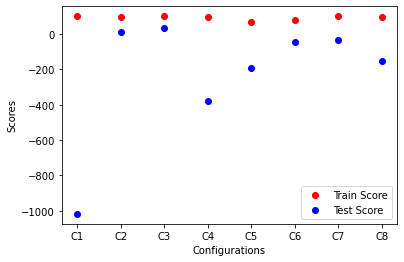

314.0649846131397 %


In [9]:
Configs=[]
trainScores=[]
testScores=[]
xTrain=[]
yTrain=[]
xTest=[]
yTest=[]
Gaps=[]
gap=0

#Collecting Trains & Test vectors for MLP Regressor Evaluation
for i in range(1,9):
    Configs.append("C"+str(i))
    Output=dataset[:,i-9]
    #print("Configuration ",i," : ")
    #print(Output)

    #Data splitting: training set & test set: 20% | 80%
    x_train, x_test, y_train, y_test = model_selection.train_test_split(Input, Output, random_state=1, test_size = 0.20)
    x_test, x_validation, y_test, y_validation = model_selection.train_test_split(x_test, y_test, test_size=0.25, random_state=42)
 
    xTrain.append(x_train)
    yTrain.append(y_train)
    xTest.append(x_test)
    yTest.append(y_test)
for i in range(0,8):
    
    #Training
    mlp.fit(xTrain[i], yTrain[i])

    #Analyzing scores
    #print('Train score ',1,': ', mlp.score(x_train, y_train))
    #print('Test score ',1,': ', mlp.score(x_test, y_test))
    #print('\n')
    trainScores.append(mlp.score(xTrain[i], yTrain[i])*100)
    testScores.append(mlp.score(xTest[i], yTest[i])*100)
    gap+=abs((mlp.score(xTrain[i], yTrain[i])-mlp.score(xTest[i], yTest[i]))*100)
    
gap/=len(Configs)
scatter(Configs,trainScores,c='red',label='Train Score')
scatter(Configs,testScores,c='blue',label='Test Score')
plt.xlabel("Configurations")
plt.ylabel("Scores")
plt.legend()
plt.show()

print(gap,"%")
Gaps.append(gap)